In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os

In [ ]:
os.environ["KAGGLE_USERNAME"] = ""
os.environ["KAGGLE_KEY"] = ""

In [ ]:
!rm *.*
!kaggle competitions download -c pubg-finish-placement-prediction
!unzip '*.zip'

 99% 242M/244M [00:01<00:00, 163MB/s]
100% 244M/244M [00:01<00:00, 132MB/s]
 88% 88.0M/100M [00:00<00:00, 104MB/s] 
100% 100M/100M [00:00<00:00, 120MB/s] 
 53% 9.00M/17.0M [00:00<00:00, 47.7MB/s]
100% 17.0M/17.0M [00:00<00:00, 67.2MB/s]
Archive:  test_V2.csv.zip
  inflating: test_V2.csv             

Archive:  sample_submission_V2.csv.zip
  inflating: sample_submission_V2.csv  

Archive:  train_V2.csv.zip
  inflating: train_V2.csv            

3 archives were successfully processed.


In [ ]:
df = pd.read_csv('data/train_V2.csv')

In [ ]:
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad-fpp,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad-fpp,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad-fpp,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(4446965, 29)

In [ ]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [ ]:
df = df[['assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc']]

In [ ]:
df

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad-fpp,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad-fpp,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad-fpp,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [ ]:
df['matchType'].unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-duo', 'normal-squad',
       'crashtpp', 'normal-solo'], dtype=object)

## 비주류 게임모드 제거

In [ ]:
df = df.drop(df[(df['matchType']=='crashfpp') | (df['matchType']=='flaretpp')|(df['matchType']=='flarefpp')|(df['matchType']=='crashtpp')].index)

In [ ]:
df.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [ ]:
df['matchType'].unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'normal-solo-fpp', 'normal-duo-fpp',
       'normal-duo', 'normal-squad', 'normal-solo'], dtype=object)

## 게임 모드별로 나누기(solo, duo, squad)

In [ ]:
solo = df.loc[df['matchType'].isin(['solo-fpp', 'solo','normal-solo-fpp','normal-solo'])]
duosquad = df.loc[df['matchType'].isin(['duo-fpp', 'duo','normal-duo-fpp','normal-duo','squad-fpp', 'squad','normal-squad-fpp','normal-squad'])]

In [ ]:
print(solo['matchType'].unique())
print(duosquad['matchType'].unique())

['solo-fpp' 'solo' 'normal-solo-fpp' 'normal-solo']
['squad-fpp' 'duo' 'squad' 'duo-fpp' 'normal-squad-fpp' 'normal-duo-fpp'
 'normal-duo' 'normal-squad']


In [ ]:
print(solo.shape)
print(duosquad.shape)

(720712, 26)
(3716372, 26)


## 솔로모드 분석



In [ ]:
solo.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,720712.000000,720712.000000,720712.000000,720712.0,720712.000000,720712.000000,720712.000000,720712.000000,720712.000000,720712.000000,720712.000000,720712.000000,720712.000000,720712.000000,720712.000000,720712.0,720712.000000,720712.000000,720712.000000,720712.000000,720712.000000,720712.000000,720712.000000,720712.000000,720712.000000
mean,0.062236,1.059862,119.165548,0.0,0.249281,1.014149,47.457529,447.426431,0.936860,0.475054,21.566645,1600.651940,93.908900,91.115282,966.581536,0.0,463.267203,0.005113,5.087367,0.011487,0.004509,955.351968,3.593992,557.452163,0.487463
std,0.297540,1.799456,168.366983,0.0,0.660425,2.406086,27.728956,594.989089,1.603249,0.564241,46.626897,257.052724,10.134818,11.436636,744.319530,0.0,1373.801040,0.087960,34.196400,0.106860,0.069601,1069.818438,2.629932,728.839481,0.298471
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,133.000000,2.000000,1.000000,-1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,1384.000000,94.000000,91.000000,-1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,100.400000,2.000000,0.000000,0.229200
50%,0.000000,0.000000,74.400000,0.0,0.000000,0.000000,47.000000,0.000000,0.000000,0.000000,0.000000,1456.000000,96.000000,93.000000,1496.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,502.800000,3.000000,0.000000,0.483900
75%,0.000000,2.000000,169.300000,0.0,0.000000,1.000000,71.000000,1090.000000,1.000000,1.000000,20.870000,1874.000000,97.000000,95.000000,1517.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1587.000000,5.000000,1492.000000,0.747400
max,22.000000,28.000000,6616.000000,0.0,42.000000,63.000000,100.000000,1970.000000,66.000000,18.000000,1052.000000,2237.000000,100.000000,100.000000,2857.000000,0.0,40710.000000,18.000000,1974.000000,5.000000,5.000000,25780.000000,153.000000,1922.000000,1.000000


### 킬 수 분석

In [ ]:
print("솔로 유저의 평균 킬 수:", round(solo['kills'].mean(),3))
print(f"솔로 유저의 99%는 {solo['kills'].quantile(0.99)} 이하의 킬을 한다\n")

print("0킬 한 유저의 비율:", round(len(solo[solo['kills']==0])/len(solo),3))

솔로 유저의 평균 킬 수: 0.937
솔로 유저의 99%는 7.0 이하의 킬을 한다

0킬 한 유저의 비율: 0.553


In [ ]:
solo_copy = solo.copy()[['kills']]
solo_copy['kills(str)'] = solo_copy['kills'].astype('str')
solo_copy.loc[solo_copy['kills']>7, "kills(str)"] = "8+"

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


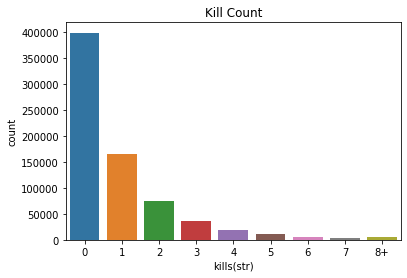

In [ ]:
sns.countplot(solo_copy["kills(str)"].sort_values())
plt.title("Kill Count",fontsize=12)
plt.show()

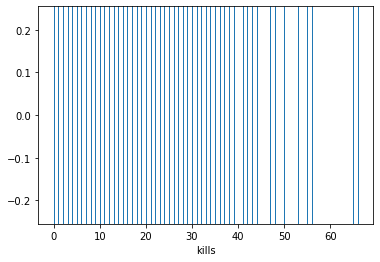

In [ ]:
sns.rugplot(x='kills', data= solo, height=1)

#### 킬수와 우승의 상관관계

- 전체 킬수

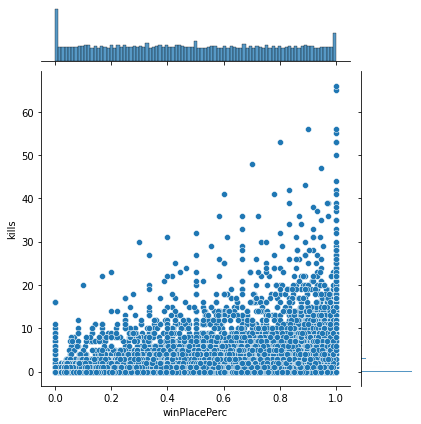

In [ ]:
sns.jointplot(x="winPlacePerc", y="kills", data=solo, height=6)
plt.show()

- 헤드샷 킬수

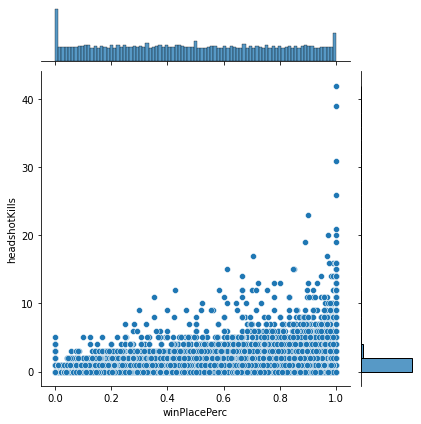

In [ ]:
sns.jointplot(x="winPlacePerc", y="headshotKills", data=solo, height=6)
plt.show()

### 데미지 분석

In [ ]:
print("솔로 유저의 평균 데미지:", round(solo['damageDealt'].mean(),3))
print(f"솔로 유저의 99%는 {solo['damageDealt'].quantile(0.99)} 이하의 데미지를 넣는다")

솔로 유저의 평균 데미지: 119.166
솔로 유저의 99%는 754.4 이하의 데미지를 넣는다


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


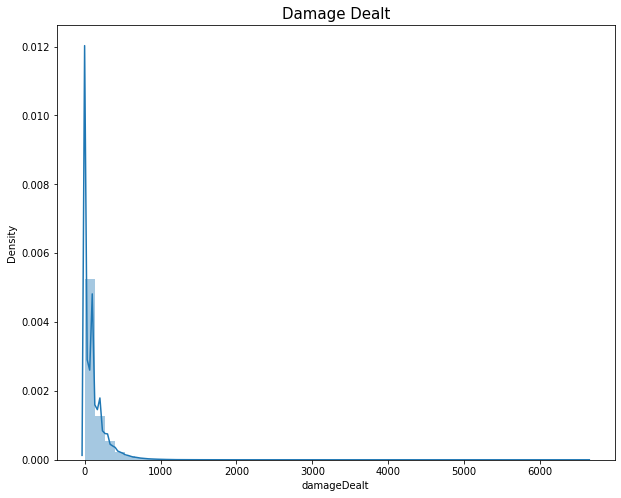

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Damage Dealt",fontsize=15)
sns.distplot(solo['damageDealt'])

In [ ]:
print("총을 한번도 못 맞추고 죽은 유저의 비율:", round(len(solo[(solo['damageDealt']==0) & (solo['winPlacePerc']!=1)]) / len(solo) *100,2),"%")
print("총을 한번도 못 맞추고 1등한 유저의 비율:", round(len(solo[(solo['damageDealt']==0) & (solo['winPlacePerc']==1)]) / len(solo) *100,2),"%")

총을 한번도 못 맞추고 죽은 유저의 비율: 32.72 %
총을 한번도 못 맞추고 1등한 유저의 비율: 0.04 %


### 걸은 거리 분석

In [ ]:
print("솔로 유저의 평균 걸은 거리:", round(solo['walkDistance'].mean(),3),"m")
print(f"솔로 유저의 99%는 {solo['walkDistance'].quantile(0.99)}m 이하를 걸어서 이동한다\n")
print("한 걸음도 못가서 죽은 유저의 비율:", round(len(solo[(solo['walkDistance']==0) & (solo['winPlacePerc']!=1)]) / len(solo) *100,2),"%") 

솔로 유저의 평균 걸은 거리: 955.352 m
솔로 유저의 99%는 4157.0m 이하를 걸어서 이동한다

한 걸음도 못가서 죽은 유저의 비율: 4.12 %


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


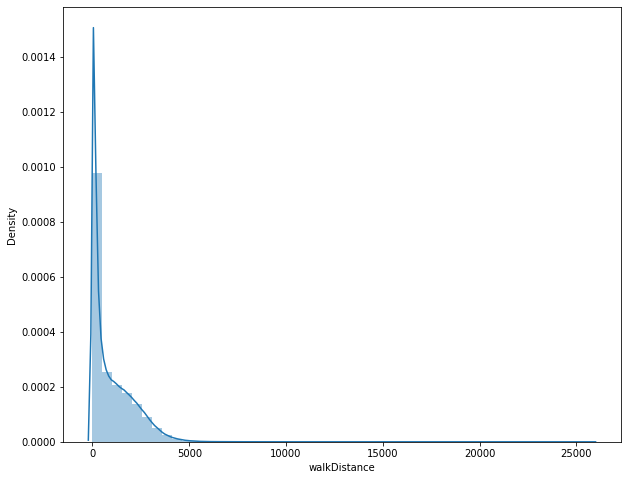

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(solo['walkDistance'])

#### 걸은 거리와 우승의 상관관계

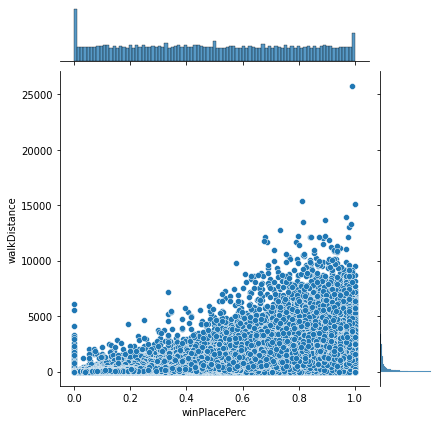

In [ ]:
sns.jointplot(x="winPlacePerc", y="walkDistance", data=solo, height=6)
plt.show()

### 차를 탄 거리 분석

In [ ]:
print("솔로 유저의 평균 차를 탄 거리:", round(solo['rideDistance'].mean(),3),"m")
print(f"솔로 유저의 99%는 {solo['rideDistance'].quantile(0.99)}m 이하를 차를 타고 이동한다\n")

print("차를 타지 않고 1등을 한 유저의 비율:", round(len(solo[(solo['rideDistance']==0) & (solo['winPlacePerc']==1)]) / len(solo) *100,2),"%") 

솔로 유저의 평균 차를 탄 거리: 463.267 m
솔로 유저의 99%는 6609.0m 이하를 차를 타고 이동한다

차를 타지 않고 1등을 한 유저의 비율: 0.68 %


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


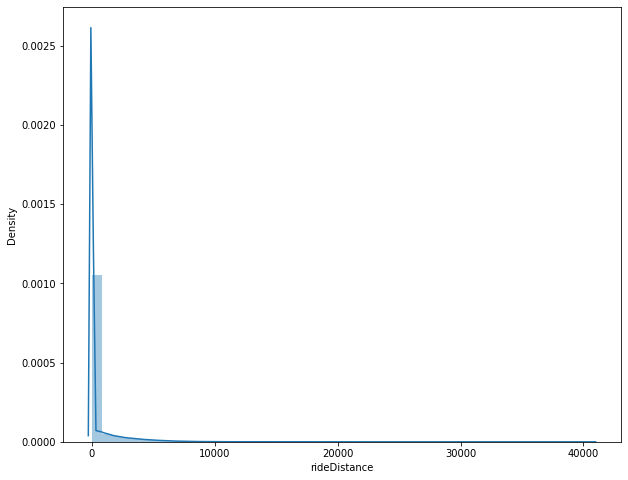

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(solo['rideDistance'])

#### 차를 타고 이동한 거리와 우승의 상관관계

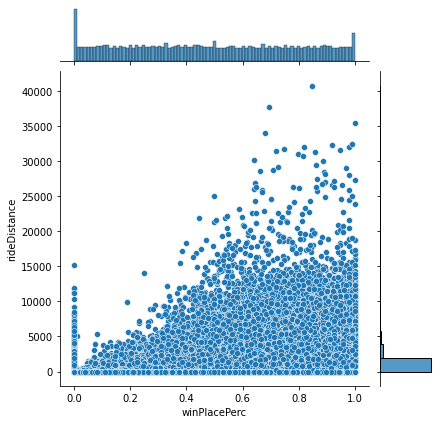

In [ ]:
sns.jointplot(x="winPlacePerc", y="rideDistance", data=solo, height=6)
plt.show()

### 차량 파괴 횟수 분석

In [ ]:
solo["vehicleDestroys"].value_counts()

0    717573
1      3041
2        88
3         8
5         1
4         1
Name: vehicleDestroys, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


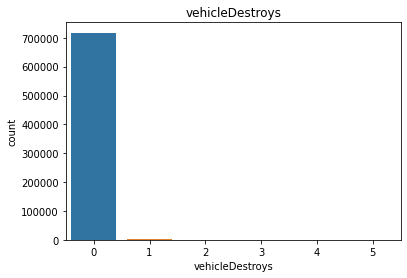

In [ ]:
sns.countplot(solo["vehicleDestroys"].sort_values())
plt.title("vehicleDestroys",fontsize=12)
plt.show()

#### 차량을 파괴한 횟수와 우승의 상관관계

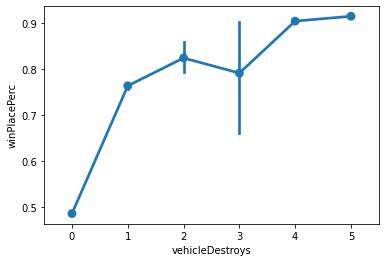

In [ ]:
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=solo)

### 치료 & 부스트 아이템 사용 횟수 분석

In [ ]:
print("솔로 유저의 평균 치료아이템 사용 횟수:", round(solo['heals'].mean(),3),"개")
print("솔로 유저의 평균 부스트아이템 사용 횟수:", round(solo['boosts'].mean(),3),"개")

솔로 유저의 평균 치료아이템 사용 횟수: 1.014 개
솔로 유저의 평균 부스트아이템 사용 횟수: 1.06 개


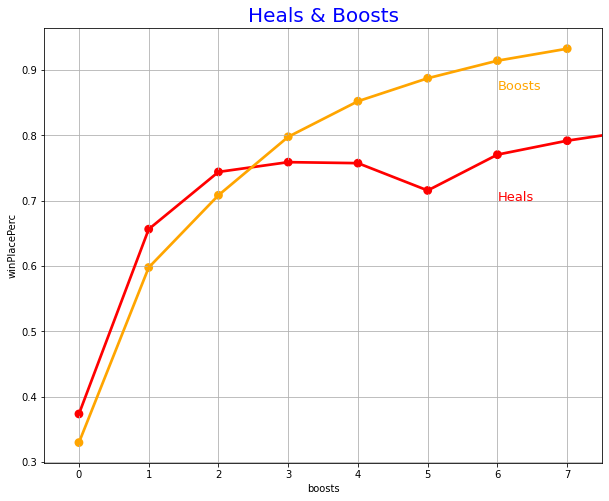

In [ ]:
data = solo[solo['heals'] < solo['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(10,8))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='red')
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='orange')
plt.text(6,0.7,'Heals',color='red',fontsize = 13)
plt.text(6,0.87,'Boosts',color='orange',fontsize = 13)
plt.title('Heals & Boosts',fontsize = 20,color='blue')
plt.grid()
plt.show()

### 무기 획득 분석

In [ ]:
print("솔로 유저의 평균 무기 획득 갯수:", round(solo['weaponsAcquired'].mean(),3),"개")
print(f"솔로 유저의 99%는 {solo['weaponsAcquired'].quantile(0.99)}개 이하의 무기를 획득한다\n")

print("무기를 줍지 못하고 죽는 유저의 비율", round(len(solo[(solo['weaponsAcquired']==0) & (solo['winPlacePerc']==0)]) / len(solo) *100,2),"%") 
print("무기를 줍지 않고 1등을 할 수 있을까?:", round(len(solo[(solo['weaponsAcquired']==0) & (solo['winPlacePerc']==1)]) / len(solo) *100,2),"%")
print("무기를 3개 이상 주웠지만 적을 한 번도 맞추지 못한 유저의 비율:", round(len(solo[(solo['weaponsAcquired']>=3) & (solo['damageDealt']==0)]) / len(solo) *100,2),"%")

솔로 유저의 평균 무기 획득 갯수: 3.594 개
솔로 유저의 99%는 11.0개 이하의 무기를 획득한다

무기를 줍지 못하고 죽는 유저의 비율 1.6 %
무기를 줍지 않고 1등을 할 수 있을까?: 0.0 %
무기를 3개 이상 주웠지만 적을 한 번도 맞추지 못한 유저의 비율: 14.14 %


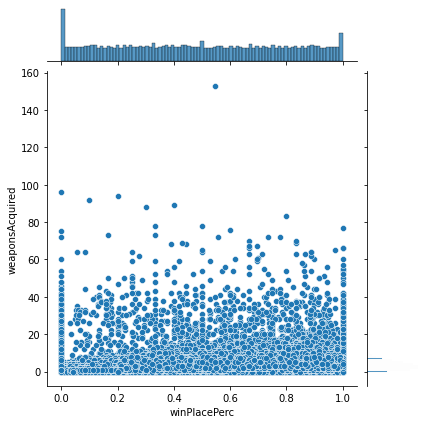

In [ ]:
sns.jointplot(x="winPlacePerc", y="weaponsAcquired", data=solo, height=6)
plt.show()

### 우승과 다른 변수들의 상관계수 확인하기

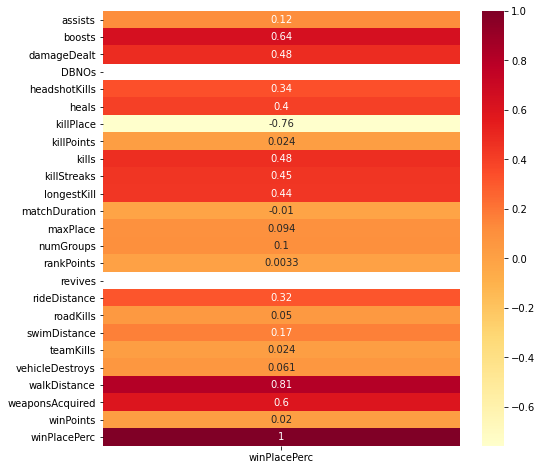

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.heatmap(solo.corr()[['winPlacePerc']],annot=True, cmap = 'YlOrRd')

## 듀오 & 스쿼드 모드 분석

In [ ]:
duosquad.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,3.716372e+06,3.716372e+06,3.716372e+06,3.716372e+06,3.716372e+06,3.716372e+06,3.716372e+06,3.716372e+06,3.716372e+06,3.716372e+06,3.716372e+06,3.716372e+06,3.716372e+06,3.716372e+06,3.716372e+06,3.716372e+06,3.716372e+06,3.716372e+06,3.716372e+06,3.716372e+06,3.716372e+06,3.716372e+06,3.716372e+06,3.716372e+06,3.716372e+06
mean,2.671167e-01,1.115777e+00,1.330292e+02,7.856420e-01,2.227643e-01,1.439097e+00,4.763577e+01,5.174388e+02,9.227454e-01,5.573858e-01,2.330536e+01,1.576379e+03,3.493716e+01,3.369329e+01,8.760470e+02,1.967238e-01,6.307601e+02,2.617068e-03,4.401424e+00,2.615992e-02,8.436185e-03,1.193387e+03,3.676588e+00,6.174622e+02,4.700076e-01
std,6.242395e-01,1.699107e+00,1.712027e+02,1.211465e+00,5.905318e-01,2.724614e+00,2.741399e+01,6.332799e+02,1.549999e+00,7.352178e-01,5.179709e+01,2.574336e+02,9.704737e+00,9.364821e+00,7.345344e+02,5.098930e-01,1.516228e+03,5.965731e-02,2.974295e+01,1.763364e-01,9.535235e-02,1.200927e+03,2.420984e+00,7.416921e+02,3.090177e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.520000e+02,2.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.364000e+03,2.800000e+01,2.700000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.673000e+02,2.000000e+00,0.000000e+00,1.923000e-01
50%,0.000000e+00,0.000000e+00,8.625000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.432000e+03,2.900000e+01,2.800000e+01,1.430000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.309000e+02,3.000000e+00,0.000000e+00,4.490000e-01
75%,0.000000e+00,2.000000e+00,1.894000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.188000e+03,1.000000e+00,1.000000e+00,2.147000e+01,1.846000e+03,4.700000e+01,4.500000e+01,1.498000e+03,0.000000e+00,1.459000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.054000e+03,5.000000e+00,1.496000e+03,7.407000e-01
max,1.700000e+01,3.300000e+01,5.990000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,1.094000e+03,2.226000e+03,5.100000e+01,5.100000e+01,5.910000e+03,3.900000e+01,3.102000e+04,8.000000e+00,3.823000e+03,1.200000e+01,5.000000e+00,1.625000e+04,2.360000e+02,2.013000e+03,1.000000e+00


### 킬 수 분석

In [ ]:
print("듀오&스쿼드 유저의 평균 킬 수:", round(duosquad['kills'].mean(),3))
print(f"듀오&스쿼드 유저의 99%는 {duosquad['kills'].quantile(0.99)} 이하의 킬을 한다\n")
print("0킬 한 유저의 비율:", round(len(duosquad[duosquad['kills']==0])/len(duosquad),3))

듀오&스쿼드 유저의 평균 킬 수: 0.923
듀오&스쿼드 유저의 99%는 7.0 이하의 킬을 한다

0킬 한 유저의 비율: 0.572


In [ ]:
duosquad_copy = duosquad.copy()[['kills']]
duosquad_copy['kills(str)'] = duosquad_copy['kills'].astype('str')
duosquad_copy.loc[duosquad_copy['kills']>7, "kills(str)"] = "8+"

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


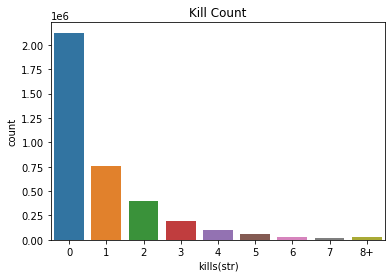

In [ ]:
sns.countplot(duosquad_copy["kills(str)"].sort_values())
plt.title("Kill Count",fontsize=12)
plt.show()

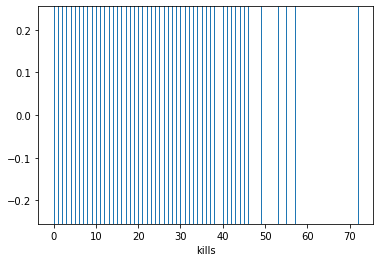

In [ ]:
sns.rugplot(x='kills', data= duosquad, height=1)

#### 킬수와 우승의 상관관계

- 전체 킬수

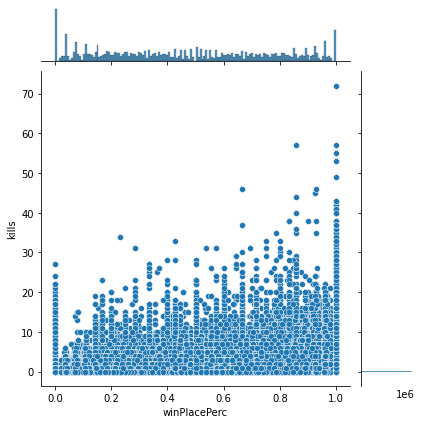

In [ ]:
sns.jointplot(x="winPlacePerc", y="kills", data=duosquad, height=6)
plt.show()

- 헤드샷 킬수

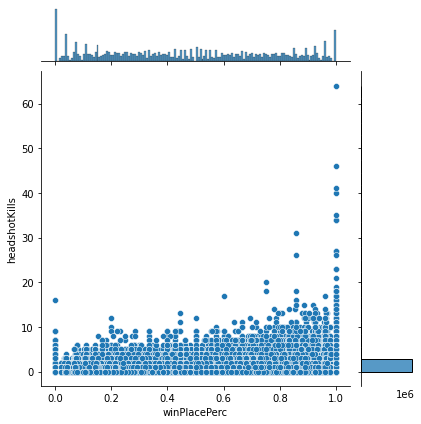

In [ ]:
sns.jointplot(x="winPlacePerc", y="headshotKills", data=duosquad, height=6)
plt.show()

### 데미지 분석

In [ ]:
print("듀오&스쿼드 유저의 평균 데미지:", round(duosquad['damageDealt'].mean(),3))
print(f"듀오&스쿼드 유저의 99%는 {duosquad['damageDealt'].quantile(0.99)} 이하의 데미지를 넣는다")

듀오&스쿼드 유저의 평균 데미지: 133.029
듀오&스쿼드 유저의 99%는 780.0 이하의 데미지를 넣는다


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


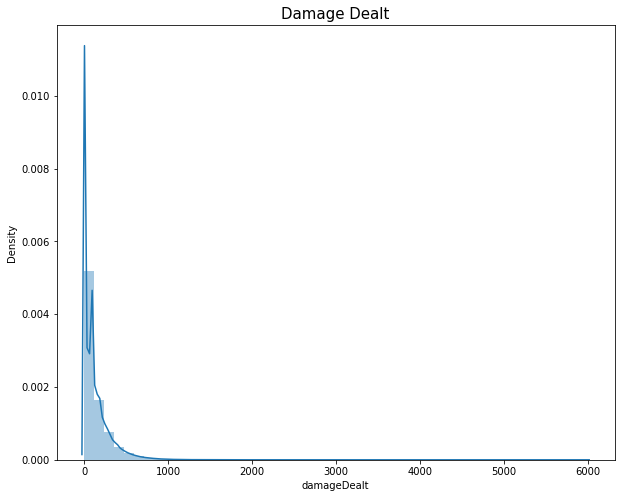

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Damage Dealt",fontsize=15)
sns.distplot(duosquad['damageDealt'])

In [ ]:
print("총을 한번도 못 맞추고 죽은 유저의 비율:", round(len(duosquad[(duosquad['damageDealt']==0) & (duosquad['winPlacePerc']!=1)]) / len(duosquad) *100,2),"%")
print("총을 한번도 못 맞추고 1등한 유저의 비율:", round(len(duosquad[(duosquad['damageDealt']==0) & (duosquad['winPlacePerc']==1)]) / len(duosquad) *100,2),"%")

총을 한번도 못 맞추고 죽은 유저의 비율: 26.74 %
총을 한번도 못 맞추고 1등한 유저의 비율: 0.12 %


### 걸은 거리 분석

In [ ]:
print("듀오&스쿼드 유저의 평균 걸은 거리:", round(duosquad['walkDistance'].mean(),3),"m")
print(f"듀오&스쿼드 유저의 99%는 {duosquad['walkDistance'].quantile(0.99)}m 이하를 걸어서 이동한다\n")
print("한 걸음도 못가서 죽은 유저의 비율:", round(len(duosquad[(duosquad['walkDistance']==0) & (duosquad['winPlacePerc']!=1)]) / len(duosquad) *100,2),"%") 

듀오&스쿼드 유저의 평균 걸은 거리: 1193.387 m
듀오&스쿼드 유저의 99%는 4432.0m 이하를 걸어서 이동한다

한 걸음도 못가서 죽은 유저의 비율: 1.85 %


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


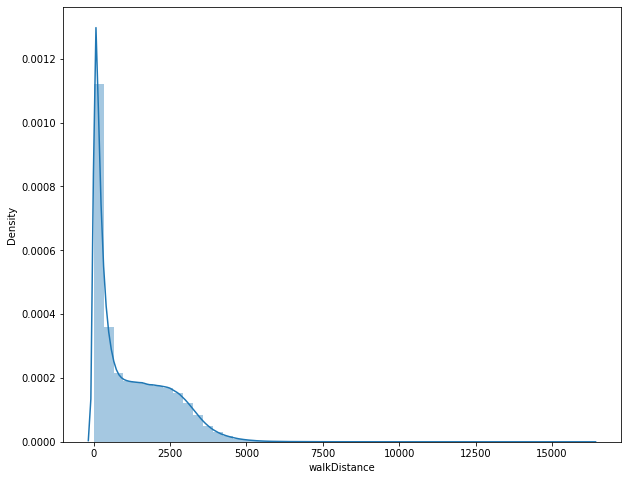

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(duosquad['walkDistance'])

#### 걸은 거리와 우승의 상관관계

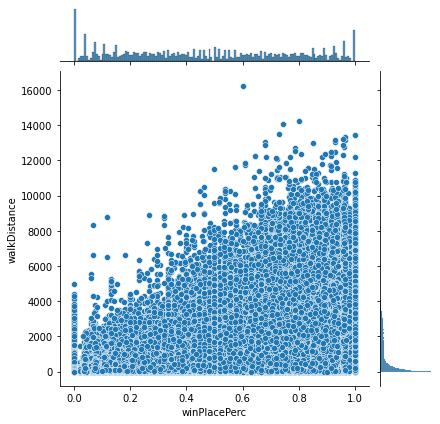

In [ ]:
sns.jointplot(x="winPlacePerc", y="walkDistance", data=duosquad, height=6)
plt.show()

### 차를 탄 거리 분석

In [ ]:
print("듀오&스쿼드 유저의 평균 차를 탄 거리:", round(duosquad['rideDistance'].mean(),3),"m")
print(f"듀오&스쿼드 유저의 99%는 {duosquad['rideDistance'].quantile(0.99)}m 이하를 차를 타고 이동한다\n")

print("차를 타지 않고 1등을 한 유저의 비율:", round(len(duosquad[(duosquad['rideDistance']==0) & (duosquad['winPlacePerc']==1)]) / len(duosquad) *100,2),"%") 

듀오&스쿼드 유저의 평균 차를 탄 거리: 630.76 m
듀오&스쿼드 유저의 99%는 7010.0m 이하를 차를 타고 이동한다

차를 타지 않고 1등을 한 유저의 비율: 1.57 %


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


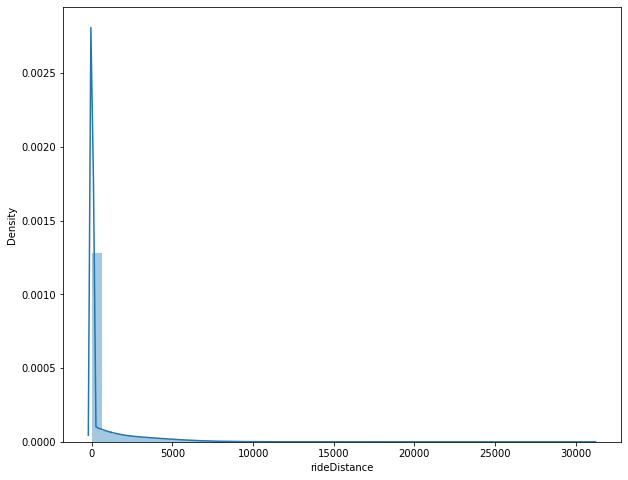

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(duosquad['rideDistance'])

#### 차를 타고 이동한 거리와 우승의 상관관계

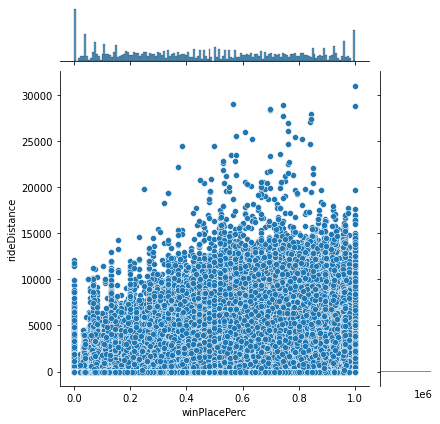

In [ ]:
sns.jointplot(x="winPlacePerc", y="rideDistance", data=duosquad, height=6)
plt.show()

### 차량 파괴 횟수 분석

In [ ]:
duosquad["vehicleDestroys"].value_counts()

0    3686268
1      28950
2       1068
3         79
4          6
5          1
Name: vehicleDestroys, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


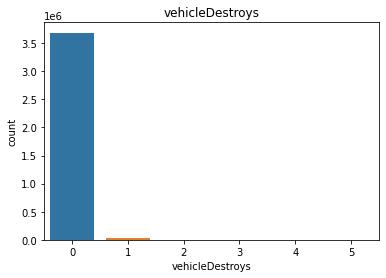

In [ ]:
sns.countplot(duosquad["vehicleDestroys"].sort_values())
plt.title("vehicleDestroys",fontsize=12)
plt.show()

#### 차량을 파괴한 횟수와 우승의 상관관계

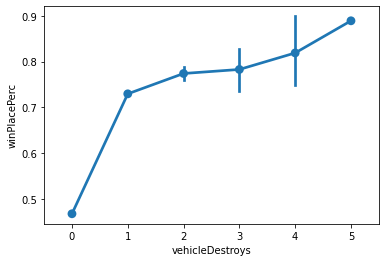

In [ ]:
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=duosquad)

### 치료 & 부스트 아이템 사용 횟수 분석

In [ ]:
print("듀오&스쿼드 유저의 평균 치료아이템 사용 횟수:", round(duosquad['heals'].mean(),3),"개")
print("듀오&스쿼드 유저의 평균 부스트아이템 사용 횟수:", round(duosquad['boosts'].mean(),3),"개")

듀오&스쿼드 유저의 평균 치료아이템 사용 횟수: 1.439 개
듀오&스쿼드 유저의 평균 부스트아이템 사용 횟수: 1.116 개


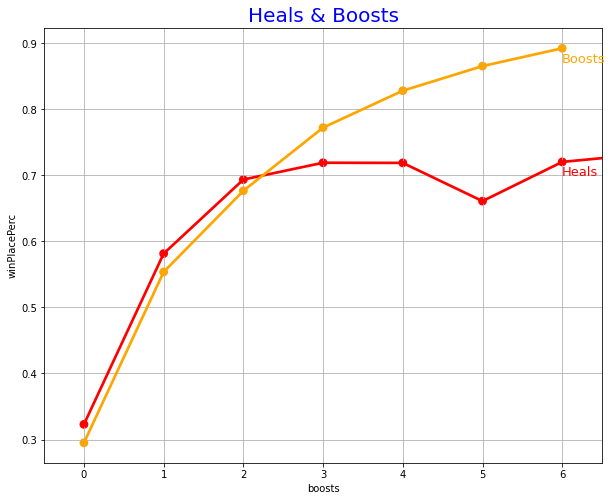

In [ ]:
data = duosquad[duosquad['heals'] < duosquad['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(10,8))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='red')
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='orange')
plt.text(6,0.7,'Heals',color='red',fontsize = 13)
plt.text(6,0.87,'Boosts',color='orange',fontsize = 13)
plt.title('Heals & Boosts',fontsize = 20,color='blue')
plt.grid()
plt.show()

### 무기 획득 분석

In [ ]:
print("듀오&스쿼드 유저의 평균 무기 획득 갯수:", round(duosquad['weaponsAcquired'].mean(),3),"개")
print(f"듀오&스쿼드 유저의 99%는 {duosquad['weaponsAcquired'].quantile(0.99)}개 이하의 무기를 획득한다\n")

print("무기를 줍지 못하고 죽는 유저의 비율", round(len(duosquad[(duosquad['weaponsAcquired']==0) & (duosquad['winPlacePerc']==0)]) / len(duosquad) *100,2),"%") 
print("무기를 줍지 않고 1등을 할 수 있을까?:", round(len(duosquad[(duosquad['weaponsAcquired']==0) & (duosquad['winPlacePerc']==1)]) / len(duosquad) *100,2),"%")
print("무기를 3개 이상 주웠지만 적을 한 번도 맞추지 못한 유저의 비율:", round(len(duosquad[(duosquad['weaponsAcquired']>=3) & (duosquad['damageDealt']==0)]) / len(duosquad) *100,2),"%")

듀오&스쿼드 유저의 평균 무기 획득 갯수: 3.677 개
듀오&스쿼드 유저의 99%는 10.0개 이하의 무기를 획득한다

무기를 줍지 못하고 죽는 유저의 비율 2.24 %
무기를 줍지 않고 1등을 할 수 있을까?: 0.0 %
무기를 3개 이상 주웠지만 적을 한 번도 맞추지 못한 유저의 비율: 12.38 %


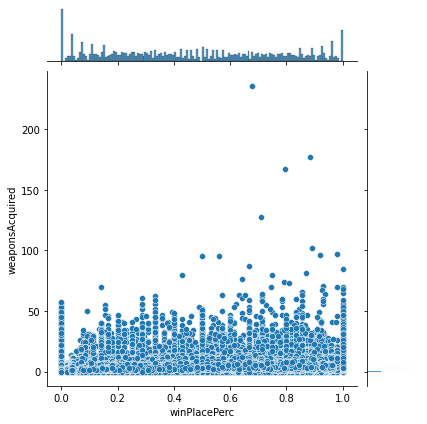

In [ ]:
sns.jointplot(x="winPlacePerc", y="weaponsAcquired", data=duosquad, height=6)
plt.show()

### 기절 시킨 적의 수 분석

In [ ]:
print("듀오&스쿼드 유저의 평균 기절시킨 횟수:", round(duosquad['DBNOs'].mean(),3),"개")
print(f"듀오&스쿼드 유저의 99%는 {duosquad['DBNOs'].quantile(0.99)}명 이하의 적을 기절시킨다\n")

듀오&스쿼드 유저의 평균 기절시킨 횟수: 0.786 개
듀오&스쿼드 유저의 99%는 5.0명 이하의 적을 기절시킨다



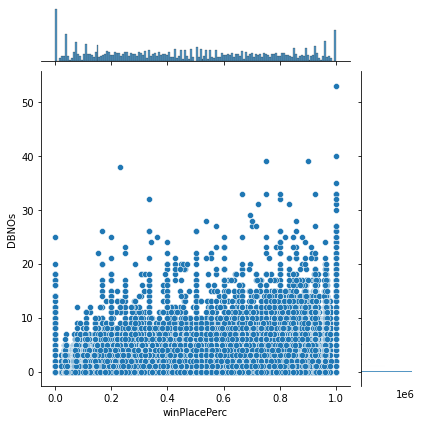

In [ ]:
sns.jointplot(x="winPlacePerc", y="DBNOs", data=duosquad, height=6)
plt.show()

### 어시스트 횟수 분석

In [ ]:
print("듀오&스쿼드 유저의 평균 어시스트 횟수:", round(duosquad['assists'].mean(),3),"개")
print(f"듀오&스쿼드 유저의 99%는 {duosquad['assists'].quantile(0.99)}명의 어시스트를 한다\n")

듀오&스쿼드 유저의 평균 어시스트 횟수: 0.267 개
듀오&스쿼드 유저의 99%는 3.0명의 어시스트를 한다



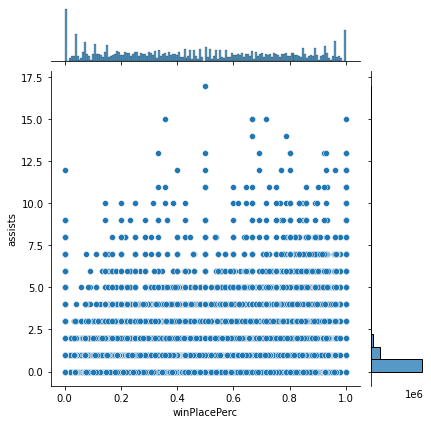

In [ ]:
sns.jointplot(x="winPlacePerc", y="assists", data=duosquad, height=6)
plt.show()

### 우승과 다른 변수들의 상관계수 확인하기

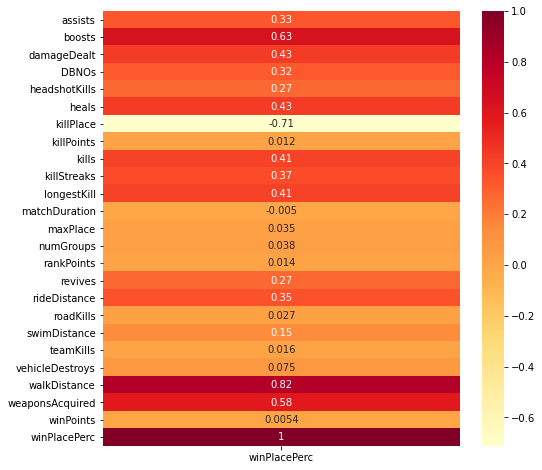

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.heatmap(duosquad.corr()[['winPlacePerc']],annot=True, cmap = 'YlOrRd')